# Analyzing Twitter Data with Python

Outline:
* [Credentials and Authentication](#Credentials-and-Authentication)
* [Collecting and Investigating Data with tweepy](#Collecting-and-Investigating-Data-with-tweepy)
    - Methods
        - Status
        - User
        - Trends
        - Search
    - Twitter Streams
        - Creating a StreamListener
        - Creating a Stream
        - Starting a Stream
* [Loading and Accessing Tweets](#Loading-and-Accessing-Tweets)
    - Saving a Status as JSON
    - Accessig a Single Tweet/Status
        - User Data
        - Retweet Data
    - Loading Multiple Tweets from JSON file
* [Processing Text](#Processing-Text)
    - Flattening Tweets and Creating a DataFrame
    - Counting Words
    - Time Series
    - Sentiment Analysis
* [Twitter Networks](#Twitter-Networks)
    - Creating a Retweet Network
    - Creating a Reply Network
    - Centrality
* [Geographical Data](#Geographical-Data)
    - asd


The `tweepy` module will be used to collect Twitter data with the Streaming API.

In [3]:
# !pip install tweepy

In [4]:
# import tweepy
from tweepy import OAuthHandler, API

import json

## Credentials and Authentication

First of all, we need to create a Twitter account, validate it, and then create a Twitter developer account. The developer account can be created within the [Twitter developer](https://developer.twitter.com/en/apps) web page.

Second, we create an app to generate a _Customer Key_, a _Consumer Secret_, an _Access Token_, and an _Access Token Secret_.

The steps to generate keys are as follows:
- Create a Twitter acoount, validate it with a phone number,
- Create a Twitter developer account,
- Create an app,
- Generate keys and tokens.

It is worth noting that the app's API keys should be kept secure. It is important not to commit API keys and access tokens to publicly accessible version control systems such as Github or BitBucket.

The Twitter credentials (keys and tokens) can be kept locally as a `.json` file in the following format.

```
{"consumer_key":"API key",
 "consumer_secret":"API secret key",
 "access_token_key":"Access token",
 "access_token_secret":"Access token secret"
}
```

In [5]:
# Load Twitter app information
with open('twitter_cred.json','r') as file:
    twitter_cred = json.load(file)

In [6]:
consumer_key = twitter_cred['consumer_key']
consumer_secret = twitter_cred['consumer_secret']
access_token = twitter_cred['access_token_key']
access_token_secret = twitter_cred['access_token_secret']

`tweepy` library requires a Twitter API key to authenticate with Twitter. The API class provides access to the entire twitter RESTful API methods.

In [7]:
# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret) # tweepy.OAuthHandler

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler: Construct the API instance
api = API(auth) # tweepy.API

We can print the username to see if our account is properly authenticated.

In [8]:
user = api.me()
# print(user.name)

## Collecting and Investigating Data with `tweepy`

`tweepy.api` is a wrapper for the Twitter API. It provides access to the entire twitter RESTful API methods. Each method can accept various parameters and return responses. 

### Methods

Methods include:
 - Timeline Methods,
 - Status Methods,
 - User Methods,
 - Direct Message Methods,
 - Friendship Methods,
 - Account Methods,
 - Favorite Methods,
 - Block Methods,
 - Saved Searches Methods, 
 - Spam Reporting Methods,
 - Help Methods,
 - List Methods,
 - Trends Methods,
 - Geo Methods.
[Source:tweepy](https://tweepy.readthedocs.io/en/v3.5.0/api.html#api-reference)

#### Status

A **status** is a _tweet_ with various attributes such as _created at_, _id_, and _text_. (See [twitter](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) for full list of attributes.)

For example, below status is [the most retweeted tweet](https://mashable.com/article/most-retweeted-tweet-billionaire/?europe=true) in English, as of 2018. `API.get_status(id)` method returns a single status specified by the ID parameter.

In [9]:
# Get the status of the most retweeted tweet
status = api.get_status('849813577770778624')

In [10]:
type(status)

tweepy.models.Status

In [11]:
# Print first 500 characters of the Status.
str(status)[:500]

"Status(_api=<tweepy.api.API object at 0x10f707080>, _json={'created_at': 'Thu Apr 06 02:38:40 +0000 2017', 'id': 849813577770778624, 'id_str': '849813577770778624', 'text': 'HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 849813572351737856, 'id_str': '849813572351737856', 'indices': [38, 61], 'media_url': 'http://pbs.twimg.com/media/C8sk8QlUwAAR3qI.jpg', 'media_url_h"

In [12]:
status.text

'HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3'

In [13]:
status.user.name

'Carter Wilkerson'

In [14]:
status.created_at

datetime.datetime(2017, 4, 6, 2, 38, 40)

In [15]:
user_id = status.user.id

#### User

In [16]:
user = api.get_user(user_id)

In [17]:
user

User(_api=<tweepy.api.API object at 0x10f707080>, _json={'id': 2568270758, 'id_str': '2568270758', 'name': 'Carter Wilkerson', 'screen_name': 'carterjwm', 'location': 'Reno, NV - San Diego, CA', 'profile_location': None, 'description': 'some call me nugget boy #NuggsforCarter', 'url': 'https://t.co/hEJZpyr0Vs', 'entities': {'url': {'urls': [{'url': 'https://t.co/hEJZpyr0Vs', 'expanded_url': 'http://nuggsforcarter.com', 'display_url': 'nuggsforcarter.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 95914, 'friends_count': 304, 'listed_count': 3279, 'created_at': 'Sun Jun 15 03:48:03 +0000 2014', 'favourites_count': 28024, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 1782, 'lang': None, 'status': {'created_at': 'Fri Aug 16 03:01:49 +0000 2019', 'id': 1162197742849888260, 'id_str': '1162197742849888260', 'text': 'how many retweets to never tweet again?', 'truncated': False, 'entities': {'ha

In [18]:
user.name

'Carter Wilkerson'

In [19]:
user.friends_count

304

In [20]:
# api.friends(user_id)

#### Trends

_Where On Earth IDentifier (WOEID)_ is used to represent a _place_. `.trends_available()` method gives us a list of dictionaries within which WOEID's are available.

In [21]:
# Choose country
country = 'Turkey'

# Get the available WOEID of the selected country
next((item for item in api.trends_available() if item["name"] == country), None)

{'name': 'Turkey',
 'placeType': {'code': 12, 'name': 'Country'},
 'url': 'http://where.yahooapis.com/v1/place/23424969',
 'parentid': 1,
 'country': 'Turkey',
 'woeid': 23424969,
 'countryCode': 'TR'}

In [22]:
# Get the WOEID for the Worldwide trends
api.trends_available()[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [23]:
# Worldwide trends (WOEID=1)
trends_ww = api.trends_place(1)

# name of the first top trend worldwide
trends_ww[0]['trends'][0]['name']

'#kayyum'

#### Search (Help)

In [24]:
search_results=api.search(q="\"data science\"", geocode="51.217667,6.757514,50km", result_type="recent", count=3)

In [25]:
for i in range(3):
    print(search_results[i].user.name, 
          " - #Followers: ", search_results[i].user.followers_count,
          " - #Location: ", search_results[i].user.location,
          "\n", search_results[i].text,
          "\n")

Toby Buechsenschuetz  - #Followers:  542  - #Location:  Düsseldorf, Deutschland 
 A5 Data science shapes one side of the spectrum. But in the front office, new skills include consultative selling,… https://t.co/VyiKiNP5G1 

Sunny Porinju  - #Followers:  1608  - #Location:  Düsseldorf, Germany 
 Excited to watch this - the trailer looks great! Watch “Data Science Pioneers Trailer - Coming Winter 2019”  https://t.co/HNcz4gP5lZ 

@mariuskarma  - #Followers:  6159  - #Location:  Duisburg, Deutschland 
 Checking out "Invitation to Join Data Science Central" on Data Science Central: https://t.co/dxxdUpMZ4j 



More info on [twitter](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html).

### Twitter Streams

After we establish the connection to the stream, we will begin receiving a stream of data. The Twitter Streaming API allows us to collect real-time Twitter data based on either a sample or **keyword** filtering. 

>Using the streaming api has three steps.
 - Create a class inheriting from StreamListener,
 - Using that class create a Stream object,
 - Connect to the Twitter API using the Stream. [Source: tweepy](https://tweepy.readthedocs.io/en/v3.5.0/streaming_how_to.html)

#### Creating a StreamListener

Below code calls a Stream Listener. [Adapted from](https://github.com/SocialDataAnalytics-Winter2018/lab04/blob/master/slistener.py) 

In [26]:
# %run SListener.py

Alternatively, we can load the file into the cell with the `%load` magic command. (`%load?` for more info)

In [27]:
# Print SListener.py
# %load SListener.py

#### Creating a Stream

In [28]:
# from tweepy import Stream

# # Instantiate the SListener object, specify a time limit to listen (in seconds) 
# listener = SListener(api, time_limit=300)

# # Instantiate the Stream object
# stream = Stream(auth, listener) # tweepy.Stream

There are various _streams_ available through Tweepy. We'll use `filter` to stream all tweets containing the _keywords_ in this notebook.

#### Starting a Stream

In [29]:
# # Set up keywords to track
# keywords = ['datascience', 'python']

# # Begin collecting data
# stream.filter(track = keywords) # is_async=True to run on a new thread

> Streams not terminate unless the connection is closed, blocking the thread. Tweepy offers a convenient async parameter on filter so the stream will run on a new thread. For example

`myStream.filter(track=['python'], async=True)`

## Loading and Accessing Tweets

Tweets are collected from the Streaming API in **JSON** format. JSON is written with JavaScript object notation. We need to convert data into a Python data structure to work on it.

### Saving a Status as JSON

We can convert the status object to JSON format using `.dumps()` function. The parameter `indent` is to make it easier reading the result.

In [30]:
# Status to json object (encoding)
tweet_json = json.dumps(status._json, indent=2)
print(tweet_json[:500])

{
  "created_at": "Thu Apr 06 02:38:40 +0000 2017",
  "id": 849813577770778624,
  "id_str": "849813577770778624",
  "text": "HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3",
  "truncated": false,
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 849813572351737856,
        "id_str": "849813572351737856",
        "indices": [
          38,
          61
        ],
        "media_url": "http://pbs.twim


In [31]:
type(tweet_json), type(status)

(str, tweepy.models.Status)

### Accessing a Single Tweet

JSON can be converted to Python object using the `.loads()` method. See links for the difference between [json.load](https://docs.python.org/3/library/json.html#json.load) and [json.loads](https://docs.python.org/3/library/json.html#json.loads)

In [32]:
# Convert from JSON(str) to Python object->dict (decode JSON)
tweet = json.loads(tweet_json)

type(tweet)

dict

In [33]:
# Print the main keys of the tweet
for k, v in tweet.items():
    print(k)

created_at
id
id_str
text
truncated
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
possibly_sensitive_appealable
lang


In [34]:
# Print tweet text
print(tweet['text'])

# Print tweet id
print(tweet['id'])

HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
849813577770778624


#### User Data

In [35]:
print(type(tweet['user']))
# Print information on the user
tweet['user']

<class 'dict'>


{'id': 2568270758,
 'id_str': '2568270758',
 'name': 'Carter Wilkerson',
 'screen_name': 'carterjwm',
 'location': 'Reno, NV - San Diego, CA',
 'description': 'some call me nugget boy #NuggsforCarter',
 'url': 'https://t.co/hEJZpyr0Vs',
 'entities': {'url': {'urls': [{'url': 'https://t.co/hEJZpyr0Vs',
     'expanded_url': 'http://nuggsforcarter.com',
     'display_url': 'nuggsforcarter.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 95914,
 'friends_count': 304,
 'listed_count': 3279,
 'created_at': 'Sun Jun 15 03:48:03 +0000 2014',
 'favourites_count': 28024,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 1782,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https'

In [36]:
# Print the main keys of the tweet
tweet['user'].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [37]:
# Print user name
print(tweet['user']['screen_name'])

# Print user follower count
print(tweet['user']['followers_count'])

# Print user location
print(tweet['user']['location'])

# Print user description
print(tweet['user']['description'])

# Print the number of retweets
print(tweet['retweet_count'])

carterjwm
95914
Reno, NV - San Diego, CA
some call me nugget boy #NuggsforCarter
3482151


In [38]:
# Check whether retweet or not
print(tweet['retweeted'])

False


#### Retweet Data

The structure of a retweet is similar to that of a tweet. Additionally, it holds information in `retweeted_status` field.

In [39]:
try:
    tweet['retweeted_status']
except:
    print("This is not a RT")

This is not a RT


In [40]:
with open('tweets_1min.json', 'r') as tweet_json:
    # Read in the first status in the JSON file
    rt = tweet_json.read().split("\n")[0]

# Decode JSON
retweet = json.loads(rt)

In [41]:
retweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

In [42]:
# Print the text of the tweet
print(retweet['text'])

RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️🥳 

The parser…


In [43]:
# Print the text of the tweet
#print(retweet['text'])

# Print the text of tweet which has been retweeted
#print(retweet['retweeted_status']['text'])

# Print the user handle of the tweet
#print(retweet['user']['screen_name'])

# Print the user handle of the tweet which has been retweeted
#print(retweet['retweeted_status']['user']['screen_name'])

In [44]:
retweet['retweeted_status'].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'extended_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang'])

In [45]:
# Print the text (140 characters) of the  original tweet (retweet)
retweet['retweeted_status']['text']

'The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️🥳 \n\nT… https://t.co/5NcPvO2hzn'

In [46]:
# Print the full text (140+ characters) of the retweet
retweet['retweeted_status']['extended_tweet']['full_text']

'The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️🥳 \n\nThe parser generator was the first piece written for Python 29 years ago. It generates the parser rules (in the form of DFAs) from the grammar specification file.'

### Loading Multiple Tweets from a JSON File

In [47]:
with open('tweets_1min.json', 'r') as tweet_json:
    # Read in the status in the JSON file.
    twt = tweet_json.read().split("\n")

# Print the number of tweets in the file
len(twt)

26

In [48]:
# Decode JSON
tweet_1 = json.loads(twt[0])

# Print out the first tweet in the file
tweet_1['text']

'RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️🥳 \n\nThe parser…'

## Processing Text

### Flattening Tweets and Creating a DataFrame

It is usually a good practice to **flatten** the tweets (JSON file) into a single level. By doing this, we can convert necessary information to a DataFrame properly and analyze tweets in an easier manner. The function below is used to flatten tweets and prepare the data before creating a pandas DataFrame.

In [49]:
%run flatten.py
# %load flatten.py

In [50]:
# Create flattened tweet list with the above function
tweet_list = flatten('tweets_1min.json')

We may want to load hundreds of tweets for analysis. Therefore, we need to import the file as a DataFrame.

In [51]:
import pandas as pd

In [52]:
# Create a pandas DataFrame
tweets_df = pd.DataFrame(tweet_list)

In [53]:
# Display 100 columns max
pd.set_option('display.max_columns', 40)

# Print out hte first 3 tweets
tweets_df.head(3)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,user-screen_name,retweeted_status-user-screen_name,retweeted_status-text,retweeted_status-extended_tweet-full_text,display_text_range,extended_tweet,possibly_sensitive,extended_tweet-full_text,extended_entities
0,Sat Mar 02 19:19:29 +0000 2019,1101925010082394112,1101925010082394112,"RT @pyblogsal: The oldest piece of CPython, th...","<a href=""http://tapbots.com/tweetbot"" rel=""nof...",False,NaN,None,NaN,None,None,"{'id': 18064071, 'id_str': '18064071', 'name':...",None,None,None,None,{'created_at': 'Sat Mar 02 15:58:50 +0000 2019...,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1551554369837,erickgnavar,pyblogsal,"The oldest piece of CPython, the parser genera...","The oldest piece of CPython, the parser genera...",NaN,NaN,NaN,NaN,NaN
1,Sat Mar 02 19:19:29 +0000 2019,1101925010346835968,1101925010346835968,"Hier mal das, was das Projekt grundlegend zeig...","<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,None,None,"{'id': 3292060903, 'id_str': '3292060903', 'na...",None,None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,de,1551554369900,l9cgv,NaN,NaN,NaN,"[0, 140]","{'full_text': 'Hier mal das, was das Projekt g...",False,"Hier mal das, was das Projekt grundlegend zeig...",NaN
2,Sat Mar 02 19:19:33 +0000 2019,1101925027258093568,1101925027258093568,Python resulta ser el mejor lenguaje de 2018 h...,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",False,NaN,None,NaN,None,None,"{'id': 903393260860825600, 'id_str': '90339326...",None,None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,es,1551554373932,SharkBrand10,NaN,NaN,NaN,"[0, 68]",NaN,False,NaN,"{'media': [{'id': 1101925025471295488, 'id_str..."


In [54]:
# Print out the text of the first 3 tweets
tweets_df['text'].values[0:3]

array(['RT @pyblogsal: The oldest piece of CPython, the parser generator (pgen) has been retired and replaced with a new version! 🐍🖥️🥳 \n\nThe parser…',
       'Hier mal das, was das Projekt grundlegend zeigen soll... Eine Art Visualisierung in Form von LED-Streifen über ein… https://t.co/vln2xW8H5R',
       'Python resulta ser el mejor lenguaje de 2018 https://t.co/uXhtxheYcW https://t.co/L0AqT6KniN'],
      dtype=object)

In [55]:
# Print out the number of retweets
tweets_df.retweeted_status.notnull().sum()

15

### Counting Words

Counting words is the basic step for text analysis. There are 26 tweets in our Data Frame.

In [56]:
# The number of tweets in the DataFrame
tweets_df.shape[0]

26

We can use `str.contains()` along with `sum()` to count the frequency of a keyword. `case` parameter is for selecting case sensitivity.

In [57]:
# Number of tweets that contain the keyword "python"
print(tweets_df['text'].str.contains('python', case = False).sum())

# Find mentions of "#python" in 'text'
print(tweets_df['text'].str.contains('#python', case=False).sum())

12
2


In [58]:
# Number of tweets that contain the keyword "datascience"
tweets_df['text'].str.contains('datascience', case = False).sum()

5

In [59]:
# Print proportion of tweets mentioning python
print("Proportion of 'python' tweets:", tweets_df['text'].str.contains('python', case = False).sum() / tweets_df.shape[0])

Proportion of 'python' tweets: 0.46153846153846156


We have previously searched for keywords 'python' and 'datascience'. Sum of the two occurences are $12 + 5 = 17$. However, we have a total of 26 tweets. The reason we have less number of occurences is that we have only looked in the main `text` field. The keywords may well be in the `extended_tweet`, the `quoted_status`, and the `retweeted_status` fields. Thus we need to search all text fields. 

|#|Text Fields|
|-|:----------|
|1|text|
|2|extended_tweet > full_text|
|3|quoted_status > text|
|4|quoted_status > extended_tweet > full_text|
|5|retweeted_status > text|
|6|retweeted_status > extended_tweet > full_text|

In [60]:
def check_keywords(keyword, data):
    """Checks if a keyword is in a Twitter text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets. Returns a logical pandas Series.
    """
    check_col = data['text'].str.contains(keyword, case = False)
    check_col |= data['extended_tweet-full_text'].str.contains(keyword, case = False)
#    check_col |= data['quoted_status-text'].str.contains(keyword, case = False)
#    check_col |= data['quoted_status-extended_tweet-full_text'].str.contains(keyword, case = False)
    check_col |= data['retweeted_status-text'].str.contains(keyword, case=False)
    check_col |= data['retweeted_status-extended_tweet-full_text'].str.contains(keyword, case=False)
    
    return check_col

In [61]:
# Find mentions of python in all text fields
python = check_keywords('python', tweets_df)
print(python.sum())

# Find mentions of both python and datascience in all text fields
datascience = check_keywords('datascience', tweets_df)
print(datascience.sum())

# Print proportion of tweets mentioning python
print("Proportion of 'python' tweets:", python.sum() / tweets_df.shape[0])

# Print proportion of tweets mentioning datascience
print("Proportion of 'datascience' tweets:", datascience.sum() / tweets_df.shape[0])

17
10
Proportion of 'python' tweets: 0.6538461538461539
Proportion of 'datascience' tweets: 0.38461538461538464


### Time Series

We can explore the various attributes of tweet data over time. We need to change the data type of a specific column (`created_at`) from `object` to `datetime`. However, We'll first read in a file with more tweets.

In [62]:
# Create flattened tweet list
tweet_10_list = flatten('tweets_10min.json')

# Create a pandas DataFrame
tweets10_df = pd.DataFrame(tweet_10_list)

# The number of tweets in the DataFrame
tweets10_df.shape[0]

176

In [63]:
# Print the head of the 'created_at' column
tweets10_df.created_at.head()

0    Wed Jun 12 13:04:47 +0000 2019
1    Wed Jun 12 13:04:49 +0000 2019
2    Wed Jun 12 13:04:58 +0000 2019
3    Wed Jun 12 13:05:01 +0000 2019
4    Wed Jun 12 13:05:01 +0000 2019
Name: created_at, dtype: object

In [64]:
# Convert the created_at column to a `datetime` object
tweets10_df['created_at'] = pd.to_datetime(tweets10_df['created_at'])

# Print created_at to see new format
print(tweets10_df['created_at'].head())

# Set the index of ds_tweets to created_at
tweets10_df = tweets10_df.set_index("created_at")

0   2019-06-12 13:04:47+00:00
1   2019-06-12 13:04:49+00:00
2   2019-06-12 13:04:58+00:00
3   2019-06-12 13:05:01+00:00
4   2019-06-12 13:05:01+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [65]:
# Create a python column
tweets10_df['python'] = check_keywords('python', tweets10_df)

# Create an rstats column
tweets10_df['datascience'] = check_keywords('datascience', tweets10_df)

`resample()` can be used as a method for frequency conversion (e.g., converting secondly data into 10-minutely data) and resampling of time series. It is similar to a time-based groupby, followed by a reduction method on each of its groups.

In [66]:
# Downsample the series into 1 minute (1T) bins and ...
# Take the mean of the values of the timestamps falling into a bin.
tweets10_df['python'].resample('1T').mean()

created_at
2019-06-12 13:04:00+00:00    0.333333
2019-06-12 13:05:00+00:00    0.764706
2019-06-12 13:06:00+00:00    0.588235
2019-06-12 13:07:00+00:00    0.523810
2019-06-12 13:08:00+00:00    0.666667
2019-06-12 13:09:00+00:00    0.571429
2019-06-12 13:10:00+00:00    0.500000
2019-06-12 13:11:00+00:00    0.444444
2019-06-12 13:12:00+00:00    0.388889
2019-06-12 13:13:00+00:00    0.500000
2019-06-12 13:14:00+00:00    0.400000
Freq: T, Name: python, dtype: float64

In [67]:
import matplotlib.pyplot as plt

# Average of python column by minutes
mean_python = tweets10_df['python'].resample('1T').mean()

# Average of datascience column by minutes
mean_datascience = tweets10_df['datascience'].resample('1T').mean()

# Extract minutes (X coordinates)
p_minutes = mean_python.index.minute.values
d_minutes = mean_datascience.index.minute.values

# Plot mean python by day(orange)/mean datascience by day(blue)
plt.plot(p_minutes, mean_python, color = 'orange')
plt.plot(d_minutes, mean_datascience, color = 'blue')

# Add labels and show
plt.xlabel('Minutes'); plt.ylabel('Frequency')
plt.title('Mentions over time')
plt.legend(('python', 'datascience'))
plt.show()

<Figure size 640x480 with 1 Axes>

### Sentiment Analysis

We can assess positivity and negativity of text using _Sentiment Analysis_. This would be particularly useful to analyse reactions to an event, a person, or a policy. We'll use [VADER](https://github.com/cjhutto/vaderSentiment) (Valence Aware Dictionary and sEntiment Reasoner) for this analysis. `vader` is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in **social media**. 

In [68]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [69]:
def sentiment_analyzer_scores(sentence):
    '''
    Evaluates polarity scores of a given sentence and prints the result.
    '''
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [70]:
# Positive sentiments (example)
sentiment_analyzer_scores("It's great to hear from you!")
sentiment_analyzer_scores("It's GREAT to hear from you!")
sentiment_analyzer_scores("It's GREAT to hear from you!!!")

It's great to hear from you!------------ {'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.6588}
It's GREAT to hear from you!------------ {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.729}
It's GREAT to hear from you!!!---------- {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound': 0.7723}


In [71]:
# Negative sentiments (example)
sentiment_analyzer_scores("I am really dissatisfied by the procedure!")
sentiment_analyzer_scores("I am really dissatisfied by the procedure! :(")

I am really dissatisfied by the procedure! {'neg': 0.389, 'neu': 0.611, 'pos': 0.0, 'compound': -0.4914}
I am really dissatisfied by the procedure! :( {'neg': 0.549, 'neu': 0.451, 'pos': 0.0, 'compound': -0.7257}


>The `pos`, `neu`, and `neg` scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence. 
The `compound` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

>It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:
- positive sentiment: `compound` score >= 0.05
- neutral sentiment: (`compound` score > -0.05) and (`compound` score < 0.05)
- negative sentiment: `compound` score <= -0.05


In [72]:
# Generate sentiment scores
sentiment_scores = tweets10_df['text'].apply(analyzer.polarity_scores)

sentiment_scores[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [73]:
# Print type of sentiment_scores
print(type(sentiment_scores))

# Print the head of scores (full)
with pd.option_context('max_colwidth', -1):
    print(sentiment_scores.head())

<class 'pandas.core.series.Series'>
created_at
2019-06-12 13:04:47+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2019-06-12 13:04:49+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2019-06-12 13:04:58+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2019-06-12 13:05:01+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2019-06-12 13:05:01+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Name: text, dtype: object


In [74]:
import numpy as np
tweets10_df['sentiment'] = np.array([x['compound'] for x in sentiment_scores])

In [75]:
tweets10_df.sentiment.sample(10)

created_at
2019-06-12 13:06:50+00:00    0.0000
2019-06-12 13:08:38+00:00    0.0000
2019-06-12 13:08:15+00:00    0.6166
2019-06-12 13:05:37+00:00    0.0000
2019-06-12 13:08:08+00:00    0.0000
2019-06-12 13:05:12+00:00    0.7345
2019-06-12 13:12:04+00:00    0.3182
2019-06-12 13:11:57+00:00    0.4767
2019-06-12 13:14:20+00:00    0.4767
2019-06-12 13:11:31+00:00    0.0000
Name: sentiment, dtype: float64

In [76]:
# Print out the text of a positive tweet
print('Positive:')
print(tweets10_df[tweets10_df.sentiment > 0.5]['text'].values[0])

# Print out the text of a negative tweet
print('\nNegative:')
print(tweets10_df[tweets10_df.sentiment < -0.5]['text'].values[0])

Positive:
The latest Excel Daily News! https://t.co/VLFQaTWECr Thanks to @NewLogic_0 @ExcelDemy @cdxtech #excel #python

Negative:
@aversifollo Esta fantasía se podría hacer con python? No no?


In [77]:
# Generate average sentiment scores for python
sentiment_py = tweets10_df.sentiment[check_keywords('python', tweets10_df)].resample('1T').mean()

# Generate average sentiment scores for datascience
sentiment_ds = tweets10_df.sentiment[check_keywords('datascience', tweets10_df)].resample('1T').mean()

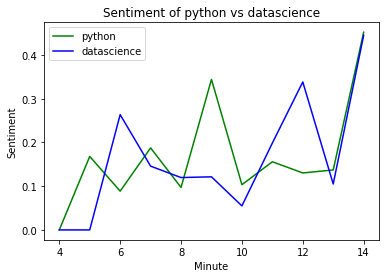

In [78]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot average python sentiment per minute
plt.plot(sentiment_py.index.minute.values, sentiment_py, color = 'green')

# Plot average datascience sentiment per minute
plt.plot(sentiment_ds.index.minute.values, sentiment_ds, color = 'blue')

plt.xlabel('Minute')
plt.ylabel('Sentiment')
plt.title('Sentiment of python vs datascience')
plt.legend(('python', 'datascience'))
plt.show()

## Twitter Networks

In [79]:
import networkx as nx

### Creating Retweet Network

In [80]:
# Import networkx
import networkx as nx

# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    tweets10_df,
    source = 'user-screen_name',
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())
 
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 211
Edges in RT network: 165


### Creating reply network

In [81]:
# Import networkx
import networkx as nx

# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    tweets10_df,
    source = 'user-screen_name',
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

Nodes in reply network: 173
Edges in reply network: 161


### Visualizing retweet network

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


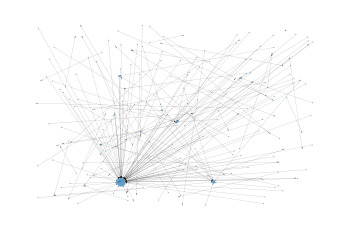

In [82]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos=pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

### Centrality

<img src="https://www.researchgate.net/publication/309523121/figure/fig3/AS:422708409311235@1477792946821/Individual-node-metrics-In-degree-Out-degree-and-Betweenness-centrality-interpretations_W640.jpg" width="300">

[_image credit_](https://www.researchgate.net/publication/309523121_Quantifying_a_Systems_Map_Network_Analysis_of_a_Childhood_Obesity_Causal_Loop_Diagram/figures?lo=1)

#### In-degree centrality

In [83]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)

column_names = ['screen_name', 'degree_centrality']

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

      screen_name  degree_centrality
1             NaN           0.376190
62      antgrasso           0.052381
29       DJIJAPAN           0.033333
39  Paula_Piccard           0.014286
7   oreilly_japan           0.014286
     screen_name  degree_centrality
1           None           0.860465
132     horejsek           0.005814
13     AdamWylde           0.005814
88   pkdouglas16           0.005814
101       raaleh           0.005814


#### Betweenness Centrality

In [84]:
# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

column_names = ['screen_name', 'betweenness_centrality']

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('betweenness_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('betweenness_centrality', ascending = False).head())

        screen_name  betweenness_centrality
44        raodeepak                0.000046
70        voidspace                0.000046
57   DrAndyCallaway                0.000023
25   CambridgeSpark                0.000023
114     danilobzdok                0.000023
         screen_name  betweenness_centrality
0         workwithai                     0.0
119      CyberDomain                     0.0
111          oichiOi                     0.0
112  DivyeshArdeshan                     0.0
113     nature_faces                     0.0


#### Ratios

In [85]:
column_names = ['screen_name', 'degree']

# Calculate in-degrees and store in DataFrame
degree_rt = pd.DataFrame(list(G_rt.in_degree()), columns = column_names)
degree_reply = pd.DataFrame(list(G_reply.in_degree()), columns = column_names)

# Merge the two DataFrames on screen name
ratio = degree_rt.merge(degree_reply, on = 'screen_name', suffixes = ('_rt', '_reply'))

# Calculate the ratio
ratio['ratio'] = ratio.degree_reply / ratio.degree_rt

# Exclude any tweets with less than 5 retweets
ratio = ratio[ratio['degree_rt'] >= 5]

# Print out first five with highest ratio
print(ratio.sort_values('ratio', ascending = False).head())

  screen_name  degree_rt  degree_reply     ratio
1         NaN         79           148  1.873418


## Geographical Data

_Note : Less than 5% of Twitter data have geographical data. This limits the generalizebility of the inference._

There are several types of Geographical Data available in twitter. These include:
- User-defined location (imprecise)
- Place (bounding boxes) (precise)
- Coordinates and points (most precise)
- Twitter text (most imprecise)

### User Location

In [88]:
# Print out the location of a single tweet
print(tweet['user']['location'])

Reno, NV - San Diego, CA


In [94]:
from flatten import flatten

# Flatten and load the tweets into a dataframe
df = pd.DataFrame(flatten('tweets_10min.json'))

# Print out top user-defined locations
print(df['user-location'].value_counts().head())

United States      4
London, England    3
Dallas, TX         3
United Kingdom     3
The World          3
Name: user-location, dtype: int64


### Place (Bounding Box)

_Note: The bounding box can range from a city to a whole country._

In [112]:
tweets10_df[tweets10_df.place.notnull()]

,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,extended_tweet,quote_count,reply_count,...,possibly_sensitive,filter_level,lang,timestamp_ms,user-screen_name,extended_tweet-full_text,retweeted_status,retweeted_status-user-screen_name,retweeted_status-text,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quoted_status-text,quoted_status-extended_tweet-full_text,retweeted_status-extended_tweet-full_text,python,datascience,sentiment
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-12 13:07:12+00:00,1138794882234028032,1138794882234028032,Exciting opportunity for 2 posts for Funded MR...,"[0, 140]","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",True,NaN,None,NaN,None,None,"{'id': 28538041, 'id_str': '28538041', 'name':...",None,None,"{'id': '7de31e05e99a00f8', 'url': 'https://api...",None,False,{'full_text': 'Exciting opportunity for 2 post...,0,0,...,False,low,en,1560344832367,DrAndyCallaway,Exciting opportunity for 2 posts for Funded MR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,0.7184
2019-06-12 13:08:50+00:00,1138795292810256386,1138795292810256386,Exciting opportunity - 2 Funded MRes with @AFC...,"[0, 140]","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",True,NaN,None,NaN,None,None,"{'id': 28538041, 'id_str': '28538041', 'name':...",None,None,"{'id': '7de31e05e99a00f8', 'url': 'https://api...",None,False,{'full_text': 'Exciting opportunity - 2 Funded...,0,0,...,False,low,en,1560344930256,DrAndyCallaway,Exciting opportunity - 2 Funded MRes with @AFC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,0.7184
2019-06-12 13:10:06+00:00,1138795612609175554,1138795612609175554,@raaleh Ambitious Monty Python 1984 crossover ...,"[8, 52]","<a href=""http://twitter.com/download/android"" ...",False,1.138786e+18,1138785711153451008,2.891352e+09,2891352352,raaleh,"{'id': 453538450, 'id_str': '453538450', 'name...",None,None,"{'id': '315b740b108481f6', 'url': 'https://api...",None,False,NaN,0,0,...,NaN,low,en,1560345006502,BenPummell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,0.4767


In [117]:
tweet_w_place = tweets10_df[tweets10_df.place.notnull()]
type(tweet_w_place.place[0]), tweet_w_place.place[0]

(dict,
 {'id': '7de31e05e99a00f8',
  'url': 'https://api.twitter.com/1.1/geo/id/7de31e05e99a00f8.json',
  'place_type': 'city',
  'name': 'Bournemouth',
  'full_name': 'Bournemouth, England',
  'country_code': 'GB',
  'country': 'United Kingdom',
  'bounding_box': {'type': 'Polygon',
   'coordinates': [[[-1.93759, 50.7095],
     [-1.93759, 50.775036],
     [-1.767624, 50.775036],
     [-1.767624, 50.7095]]]},
  'attributes': {}})

In [118]:
tweet_w_place.place[0]['bounding_box']

{'type': 'Polygon',
 'coordinates': [[[-1.93759, 50.7095],
   [-1.93759, 50.775036],
   [-1.767624, 50.775036],
   [-1.767624, 50.7095]]]}

In [121]:
def getBoundingBox(place):
    """ Returns the bounding box coordinates."""
    return place['bounding_box']['coordinates']

# Apply the function which gets bounding box coordinates
bounding_boxes = tweet_w_place['place'].apply(getBoundingBox)

# Print out the first bounding box coordinates
print(bounding_boxes.values[0])

[[[-1.93759, 50.7095], [-1.93759, 50.775036], [-1.767624, 50.775036], [-1.767624, 50.7095]]]


In [122]:
def calculateCentroid(place):
    """ Calculates the centroid from a bounding box."""
    # Obtain the coordinates from the bounding box.
    coordinates = place['bounding_box']['coordinates'][0]
        
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    if len(longs) == 1 and len(lats) == 1:
        # return a single coordinate
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        # If we have two longs and lats, we have a box.
        central_long = np.sum(longs) / 2
        central_lat  = np.sum(lats) / 2
    else:
        raise ValueError("Non-rectangular polygon not supported: %s" % 
            ",".join(map(lambda x: str(x), coordinates)) )

    return (central_long, central_lat)
    
# Calculate the centroids of place     
centroids = tweet_w_place['place'].apply(calculateCentroid)

In [123]:
centroids

created_at
2019-06-12 13:07:12+00:00    (-1.852607, 50.742267999999996)
2019-06-12 13:08:50+00:00    (-1.852607, 50.742267999999996)
2019-06-12 13:10:06+00:00             (-2.23348, 53.4569525)
Name: place, dtype: object

### Maps

#### Ploting Centroids

In [143]:
# import os
# os.environ['PROJ_LIB'] = '/anaconda3/share/proj'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


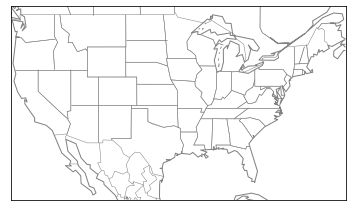

In [144]:
# Import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set up the US bounding box
us_boundingbox = [-125, 22, -64, 50] 

# Set up the Basemap object
m = Basemap(llcrnrlon = us_boundingbox[0],
            llcrnrlat = us_boundingbox[1],
            urcrnrlon = us_boundingbox[2],
            urcrnrlat = us_boundingbox[3],
            projection='merc')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the states and show the plot
m.drawstates(color='gray')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


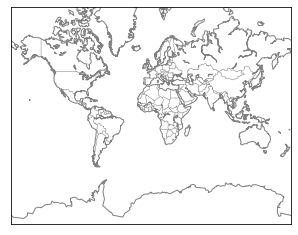

In [159]:
m = Basemap(projection='merc',
        llcrnrlat=-80,
        urcrnrlat=80,
        llcrnrlon=-180,
        urcrnrlon=180,
        resolution='c')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the states and show the plot
#m.drawstates(color='gray')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


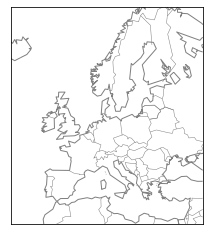

In [160]:
m = Basemap(projection='merc',
        llcrnrlat=30,
        urcrnrlat=70,
        llcrnrlon=-20,
        urcrnrlon=40,
        resolution='c')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Show the plot
plt.show()

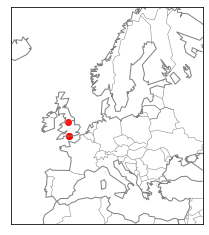

In [158]:
# Calculate the centroids for the dataset
# and isolate longitudue and latitudes
centroids = tweet_w_place['place'].apply(calculateCentroid)
lon = [x[0] for x in centroids]
lat = [x[1] for x in centroids]

# Draw continents, coastlines, countries, and states
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the points and show the plot
m.scatter(lon, lat, latlon = True, alpha = 0.9, c='r')
plt.show()

#### Coloring by Sentiments

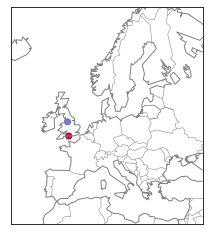

In [161]:
# Generate sentiment scores
sentiment_scores = tweet_w_place['text'].apply(analyzer.polarity_scores)

# Isolate the compound element
sentiment_scores = [x['compound'] for x in sentiment_scores]

# Draw continents, coastlines, countries, and states
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the points
m.scatter(lon, lat, latlon = True, 
           c = sentiment_scores,
           cmap = 'coolwarm', alpha = 0.7)

# Show the plot
plt.show()